In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [16]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
    path = os. path.join(cur_path,r'C:\Users\sdf\Desktop\M_DSBD_S3\Deep Learning\TP\Traffic_Sign_Recognition\Train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(path +'\\'+ a)  
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [19]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [45]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

In [49]:
history1=model.fit(X_t1, y_t1, batch_size=32, epochs=15, validation_data=(X_t2, y_t2))

Epoch 1/15
981/981 [==============================] - 110s 112ms/step - loss: 1.7733 - accuracy: 0.5106 - val_loss: 0.3984 - val_accuracy: 0.8921
Epoch 2/15
981/981 [==============================] - 102s 104ms/step - loss: 0.6798 - accuracy: 0.8008 - val_loss: 0.1898 - val_accuracy: 0.9485
Epoch 3/15
981/981 [==============================] - 112s 114ms/step - loss: 0.4697 - accuracy: 0.8666 - val_loss: 0.1283 - val_accuracy: 0.9667
Epoch 4/15
981/981 [==============================] - 137s 140ms/step - loss: 0.3555 - accuracy: 0.8992 - val_loss: 0.1081 - val_accuracy: 0.9690
Epoch 5/15
981/981 [==============================] - 129s 132ms/step - loss: 0.3038 - accuracy: 0.9133 - val_loss: 0.1043 - val_accuracy: 0.9693
Epoch 6/15
981/981 [==============================] - 105s 107ms/step - loss: 0.2972 - accuracy: 0.9185 - val_loss: 0.0873 - val_accuracy: 0.9783
Epoch 7/15
981/981 [==============================] - 83s 85ms/step - loss: 0.2422 - accuracy: 0.9323 - val_loss: 0.0760 - v

<AxesSubplot:>

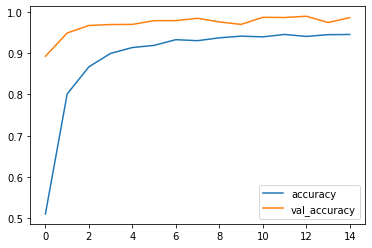

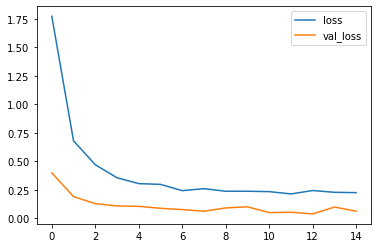

In [50]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [70]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv(r'C:\Users\sdf\Desktop\M_DSBD_S3\Deep Learning\TP\Traffic_Sign_Recognition\Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict(X_test)
pred = np.argmax(model.predict(X_test), axis=-1)

395/395 [==============================] - 7s 17ms/step


In [71]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9589073634204276


In [73]:
model.save('traffic_classifier.h5')#to save